<a href="https://colab.research.google.com/github/WebDevWizardAmit/NewbieCodeHub/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Servo Prediction using Linear Regression


#Get Understanding about Data set


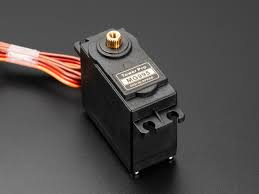



**What is servo**: A servomechanism (servo) can refer to quite a few different machines that have been around longer than most may realize. Essentially, a servo is any motor-driven system with a feedback element built in. Servos are found everywhere from heavy machinery, to power steering in vehicles, to robotics and a wide variety of electronics.

In order to move a servo to a position along its movement arc, or, in the case of continuous rotation servos the speed and direction of the motor, the controller needs to send a precisely timed signal for the servo to interpret. Typical hobby servos expect to see a pulse every 20ms, and the width of this signal determines the position. This width is usually between one and two milliseconds. This type of signal control is frequently referred to as Pulse Width Modulation, abbreviated as PWM. A servo controller will normally be a dedicated piece of hardware that can take inputs from other components like a joystick, potentiometer or sensor feedback to set the control signal for the servo. Other control options include using the PWM-capable pins on a microcontroller to send that signal directly to the servo.

The variables that describe the data set and their values are the following:
1. Motor A,B,C,D,E
2. Screw A,B,C,D,E
3. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5
5. Class 0.13 to 7.10



#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Import CSV as DataFrame

In [ ]:
df = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv")

#Get the First Five Rows of DataFrame

In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


#Get Information of DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


#Get the Summary Statistics

In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


#Get Column Names

In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

#Get The Shape of DataFrame

In [ ]:
df.shape

(167, 5)

#Get Categories and count of Categorical Variables

In [ ]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [ ]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

#Get Encoding of Categorical Features


In [ ]:
df.replace({'Motor' : {'A':0, 'B':1, 'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
df.replace({'Screw':{'A':0, 'B':1, 'C':2, 'D':3, 'E':4}},inplace=True)

#Define target or dependent or label variables(y) and independent or features or attribute variables(x)

In [ ]:
y = df['Class']

In [ ]:
y.shape

(167,)

In [ ]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [ ]:
X = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [ ]:
X.shape


(167, 4)

In [ ]:
X


,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

#Get Model Train

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

#Get Model Prediction

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict.shape

(51,)

In [ ]:
y_predict

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

#Get Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test,y_predict)

66.03589175595563

In [ ]:
mean_absolute_error(y_test,y_predict)

7.190539677251235

In [ ]:
r2_score(y_test,y_predict)

0.6807245170563927

#Get Visualisation of Actual Vs Predicted Results

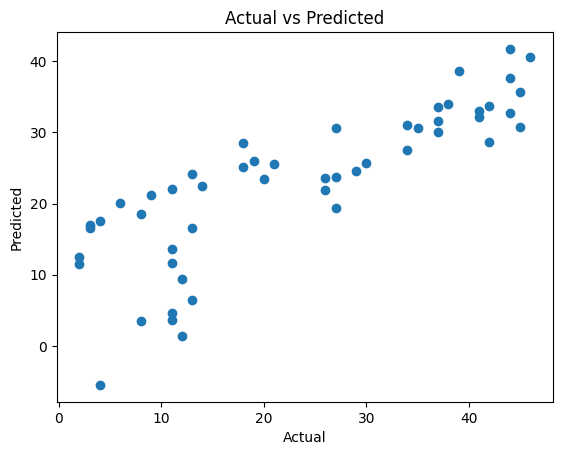

In [ ]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

#Get Future Predictions

**Let select a random sample from existing dataset as new value**
Steps to follow
1. Extract a random row using sample function
2. Separate X and y
3. Standardise X
4. Predict



In [ ]:
X_new = df.sample(1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain,Class
164,2,3,4,3,25


In [ ]:
X_new.shape

(1, 5)

In [ ]:
X_new = X_new.drop("Class", axis =1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain
164,2,3,4,3


In [ ]:
X_new.shape

(1, 4)

In [ ]:
y_pred_new = model.predict(X_new)

In [ ]:
y_pred_new

array([21.62745338])